`Visualization:` https://public.tableau.com/app/profile/muhammad.amri.hakim/viz/2021-2023FootballStatistics/Dashboard1?publish=yes

# **Identifikasi Masalah**

## -Business Problem Statement with "SMART"

`Spesific:` Meningkatkan value pemain dengan meningkatkan statistik permainan di lapangan.<br>

`Measurable:` Value meningkat 5% pada pemain.<br>

`Achievable:`Statistik permainan di lapangan meningkat dengan meningkatnya performa pemain.<br>

`Relevant:`Dengan meningkatnya statistik permainan di lapangan, value pemain akan naik.<br>

`Time-bound:`Value pemain meningkat dalam waktu 2 kuartil.<br>

## -Problem Statement with "5W+1H"

Problem Statement : `Menganalisa pengaruh value pemain terhadap statistik di lapangan dalam kurun waktu 2 musim (2021/2022, 2022/2023).`

Penjabaran:<br>
`Sejauh mana penyimpangan data terkait value pemain pada saat ini?`<br>

`Siapa saja pemain yang memiliki value terbesar saat ini?`<br>

`Siapa saja pemain yang memiliki statistik terbesar?`<br>

`Pemain mana saja yang memiliki menit bermain lebih dari 75 menit per game? (kecuali kiper)`<br>

`Team manakah yang terbaik? (acuan statistik)`<br>

`Apakah statistik di lapangan sangat berpengaruh terhadap value pemain?`<br>

# **Data Loading**

In [391]:
import pandas as pd

df = pd.read_csv('transfer_value.csv', encoding='utf-8')
pd.set_option('display.max_columns', None)
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


`Link Reference:` https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset

Insight : Dataset diambil dari link di atas yang kemudian diolah datanya menggunakan `pandas` dan dideklarasikan menggunakan variabel `df`. Setalah itu df dijalankan dan muncul seluruh data pada `csv` yang telah diambil dari link dataset `kaggle` tadi. Data terlihat ada `10754` baris dan `22` kolom.

# **Data Cleaning**

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

Insight : Fungsi `info` menampilkan seluruh `informasi` pada setiap kolom `dataframe`.

In [393]:
df_clean = df.drop(columns=['player', 'yellow cards', 'second yellow cards', 'red cards', 'days_injured'], axis=1)
df_clean = df_clean.loc[df_clean['minutes played'] >= 4500]
df_clean

,team,name,position,height,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,1.217252,0.335463,9390,5,13,15000000,70000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.000000,0.000000,6408,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.000000,0.000000,5031,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.000000,0.000000,4762,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.000000,0.000000,5471,19,10,15000000,35000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Adelaide United,Joe Gauci,Goalkeeper,194.0,22.0,54,0.000000,0.000000,1.445337,0.203830,4857,0,0,450000,450000,1,0
10705,Adelaide United,Ryan Kitto,Defender Left-Back,179.0,28.0,58,0.131359,0.075063,0.000000,0.000000,4796,0,2,400000,450000,2,1
10708,Adelaide United,Javi López,Defender Right-Back,180.0,37.0,57,0.036712,0.091781,0.000000,0.000000,4903,36,0,200000,3000000,2,1
10718,Adelaide United,Craig Goodwin,Attack-LeftWinger,183.0,31.0,55,0.449902,0.332536,0.000000,0.000000,4601,1,3,1500000,1500000,4,1


Insight : Setelah dihapus beberapa kolom menggunakan `drop` dan digunakan kondisional `minutes played` >= 4500 menggunakan `loc`, hasilnya daata yang tersisa tinggal `1995` baris dan `17` kolom. 

In [394]:
df_clean = df_clean.rename(columns={"goals": "goals_avg", "assists": "assists_avg", "goals conceded": "goals-conceded_avg", "clean sheets": "clean-sheets_avg", "minutes played": "minutes_played", "current_value": "current_value(EUR)", "highest_value": "highest_value(EUR)"})

Insight : Kemudian beberapa kolom telah `diganti` namanya dengan menggunakan fungsi `rename`.

In [395]:
df_clean[['goals_avg', 'assists_avg', 'goals-conceded_avg', 'clean-sheets_avg']] = df_clean[['goals_avg', 'assists_avg', 'goals-conceded_avg', 'clean-sheets_avg']].round(2)
df_clean

,team,name,position,height,age,appearance,goals_avg,assists_avg,goals-conceded_avg,clean-sheets_avg,minutes_played,games_injured,award,current_value(EUR),highest_value(EUR),position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.00,0.00,1.22,0.34,9390,5,13,15000000,70000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.03,0.06,0.00,0.00,6408,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.02,0.02,0.00,0.00,5031,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.04,0.00,0.00,0.00,4762,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.00,0.03,0.00,0.00,5471,19,10,15000000,35000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Adelaide United,Joe Gauci,Goalkeeper,194.0,22.0,54,0.00,0.00,1.45,0.20,4857,0,0,450000,450000,1,0
10705,Adelaide United,Ryan Kitto,Defender Left-Back,179.0,28.0,58,0.13,0.08,0.00,0.00,4796,0,2,400000,450000,2,1
10708,Adelaide United,Javi López,Defender Right-Back,180.0,37.0,57,0.04,0.09,0.00,0.00,4903,36,0,200000,3000000,2,1
10718,Adelaide United,Craig Goodwin,Attack-LeftWinger,183.0,31.0,55,0.45,0.33,0.00,0.00,4601,1,3,1500000,1500000,4,1


Insight : Dan untuk kolom `goals_avg`, `assists_avg`, `goals-conceded_avg`,dan  `clean-sheets_avg`, diberikan fungsi `round(2)` untuk menampilkan angka desimal hanya `2 digit` di belakang 0.

In [396]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 10727
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team                1995 non-null   object 
 1   name                1995 non-null   object 
 2   position            1995 non-null   object 
 3   height              1995 non-null   float64
 4   age                 1995 non-null   float64
 5   appearance          1995 non-null   int64  
 6   goals_avg           1995 non-null   float64
 7   assists_avg         1995 non-null   float64
 8   goals-conceded_avg  1995 non-null   float64
 9   clean-sheets_avg    1995 non-null   float64
 10  minutes_played      1995 non-null   int64  
 11  games_injured       1995 non-null   int64  
 12  award               1995 non-null   int64  
 13  current_value(EUR)  1995 non-null   int64  
 14  highest_value(EUR)  1995 non-null   int64  
 15  position_encoded    1995 non-null   int64  
 16  winger    

Insight : Setelah dilakukan beberapa pembersihan data, dapat dilihat kembali informasi tiap kolom menggunakan fungsi `info`. Terlihat masih ada yang belum sesuai pada tipe data di kolom `height` dan `age`.

In [397]:
df_clean[['height', 'age']] = df_clean[['height', 'age']].astype('int64')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 10727
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team                1995 non-null   object 
 1   name                1995 non-null   object 
 2   position            1995 non-null   object 
 3   height              1995 non-null   int64  
 4   age                 1995 non-null   int64  
 5   appearance          1995 non-null   int64  
 6   goals_avg           1995 non-null   float64
 7   assists_avg         1995 non-null   float64
 8   goals-conceded_avg  1995 non-null   float64
 9   clean-sheets_avg    1995 non-null   float64
 10  minutes_played      1995 non-null   int64  
 11  games_injured       1995 non-null   int64  
 12  award               1995 non-null   int64  
 13  current_value(EUR)  1995 non-null   int64  
 14  highest_value(EUR)  1995 non-null   int64  
 15  position_encoded    1995 non-null   int64  
 16  winger    

Insight : Untuk kolom `height` dan `age`, diubah tipe datanya menjadi `integer` untuk menampilkan data yang `eye catching`.

In [398]:
df_clean

,team,name,position,height,age,appearance,goals_avg,assists_avg,goals-conceded_avg,clean-sheets_avg,minutes_played,games_injured,award,current_value(EUR),highest_value(EUR),position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189,32,104,0.00,0.00,1.22,0.34,9390,5,13,15000000,70000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175,25,82,0.03,0.06,0.00,0.00,6408,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191,30,63,0.02,0.02,0.00,0.00,5031,51,21,40000000,80000000,2,0
5,Manchester United,Harry Maguire,Defender Centre-Back,194,30,68,0.04,0.00,0.00,0.00,4762,27,1,25000000,70000000,2,0
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187,28,70,0.00,0.03,0.00,0.00,5471,19,10,15000000,35000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Adelaide United,Joe Gauci,Goalkeeper,194,22,54,0.00,0.00,1.45,0.20,4857,0,0,450000,450000,1,0
10705,Adelaide United,Ryan Kitto,Defender Left-Back,179,28,58,0.13,0.08,0.00,0.00,4796,0,2,400000,450000,2,1
10708,Adelaide United,Javi López,Defender Right-Back,180,37,57,0.04,0.09,0.00,0.00,4903,36,0,200000,3000000,2,1
10718,Adelaide United,Craig Goodwin,Attack-LeftWinger,183,31,55,0.45,0.33,0.00,0.00,4601,1,3,1500000,1500000,4,1


Insight : Melihat seluruh data kembali menggunakan variabel baru yaitu `df_clean`. Terlihat pada `dataframe` bahwa semua telah `dirubah` sesuai fungsionalitas yang dijalankan.

In [399]:
df_clean.isnull().sum()

team                  0
name                  0
position              0
height                0
age                   0
appearance            0
goals_avg             0
assists_avg           0
goals-conceded_avg    0
clean-sheets_avg      0
minutes_played        0
games_injured         0
award                 0
current_value(EUR)    0
highest_value(EUR)    0
position_encoded      0
winger                0
dtype: int64

Insight : Fungsi `isnull` menampilkan beberapa data yang `null`, lalu fungsi `sum` menjumlahkan null tersebut tiap kolom. Hasilnya adalah `tidak ada` data yang null di tiap kolom.

# **Analisis dan perhitungan**

### 1. Sejauh mana penyimpangan data terkait value pemain pada saat ini?

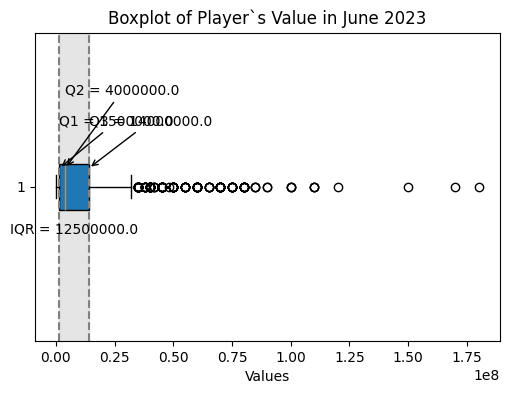

In [401]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

q1 = df_clean['current_value(EUR)'].quantile(0.25)
q2 = df_clean['current_value(EUR)'].quantile(0.5)
q3 = df_clean['current_value(EUR)'].quantile(0.75)

iqr = q3 - q1

plt.figure(figsize=(6, 4))
plt.boxplot(df_clean['current_value(EUR)'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Player`s Value in June 2023')

plt.show()

Insight : Melakukan `import` beberapa package terlebih dahulu untuk kebutuhan `perhitungan statistika` menggunakan `scipy` dengan package `stats` serta `analisis grafik` menggunakan `matplotlib` dan `seaborn`. Setelah dihitung terkait `penyimpangan` data `value` pemain menggunakan konsep `interquartil`, dibuat `grafik` menggunakan `boxplot` pada `matplotlib`. Grafik menunjukkan bahwa terdapat data yang `tidak simetris`, ekor panjang sebelah ke kanan yang menunjukkan `skewness positif.` Dan juga terdapat beberapa `outlier` pada data value pemain di bulan Juni 2023 (sesuai penanggalan scraping data). Maka dapat disimpukan bahwa `penyimpangan value pemain` pada bulan `Juni 2023` dengan menggunakan konsep interquartil adalah `cukup jauh`.

### 2. Siapa saja pemain yang memiliki value terbesar saat ini?

In [402]:
df_max_value = df_clean.sort_values(by='current_value(EUR)', ascending=False)
df_max_value[['name', 'current_value(EUR)']].head(10)

,name,current_value(EUR)
2644,Kylian Mbappé,180000000
453,Erling Haaland,170000000
1521,Vinicius Junior,150000000
960,Jude Bellingham,120000000
474,Bukayo Saka,110000000
1017,Jamal Musiala,110000000
450,Phil Foden,110000000
1523,Rodrygo,100000000
1516,Federico Valverde,100000000
2023,Victor Osimhen,100000000


Insight : Digunakan fungsi `sort_values` pada pandas untuk `menyortir` sebuah data. Dalam hal ini disortir siapa saja yang berada di 10 pemain dengan `value tertinggi` bulan Juni 2023. Maka terlihat bahwa `Kylian Mbappé` menempati posisi dengan `value tertinggi` yaitu `180 Juta Euro`, kemudian diikuti oleh Erling Haaland dengan value 170 Juta Euro, dan seterusnya hingga `urutan terakhir` dalam 10 pemain dengan value tertinggi yaitu Rodrygo, Federico Valverde, dan Victor Osimhen dengan value `100 Juta Euro`. 

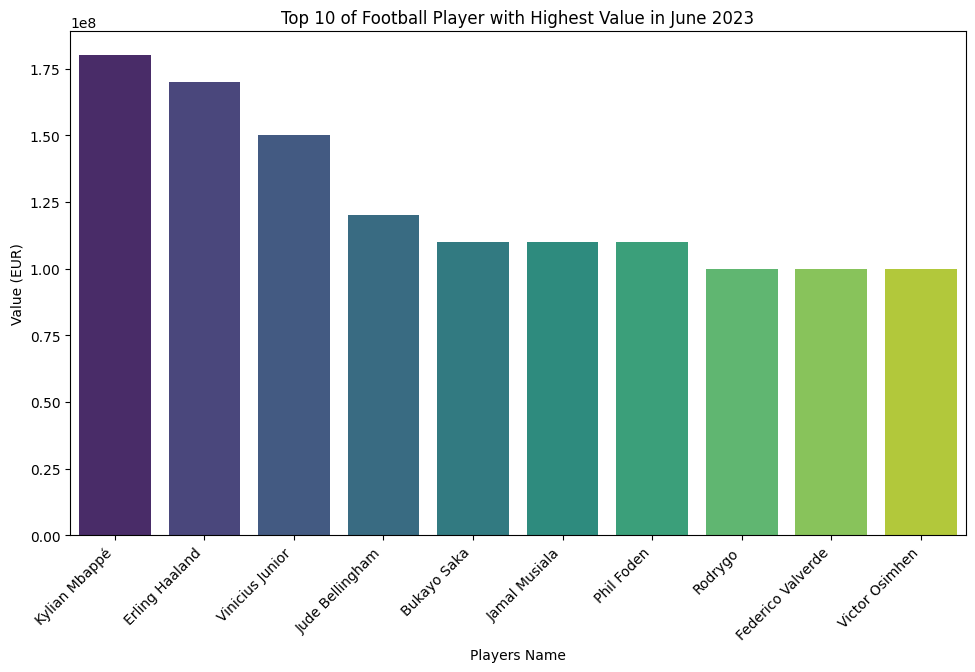

In [403]:
df_max_value = df_clean.sort_values(by='current_value(EUR)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_max_value.head(10), x='name', y='current_value(EUR)', hue='name', palette='viridis', legend=False)
plt.xlabel('Players Name')
plt.ylabel('Value (EUR)')
plt.title('Top 10 of Football Player with Highest Value in June 2023')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Insight : Terlihat bahwa grafik telah disesuaikan dengan perhitungan sebelumnya bahwa `Kylian Mbappé` menempati posisi dengan `value tertinggi` di bulan `Juni 2023` yaitu `180 Juta Euro` dan `urutan terakhir` dalam 10 pemain dengan value tertinggi yaitu `Rodrygo`, `Federico Valverde`, dan `Victor Osimhen` dengan value `100 Juta Euro`.

### 3. Siapa saja pemain yang memiliki statistik terbesar?

In [414]:
df_clean['stats'] = 0.0
df_clean.loc[(df_clean['position_encoded'] == 1), 'stats'] = ((df_clean['goals-conceded_avg'] * -0.5) + (df_clean['clean-sheets_avg'] * 9) + (df_clean['award']* 0.01)) / 3 * 200
df_clean.loc[(df_clean['position_encoded'] == 2) & (df_clean['winger'] == 0), 'stats'] = ((df_clean['goals_avg'] * 10) + (df_clean['assists_avg'] * 5) + (df_clean['award'] * 0.01)) / 3 * 200
df_clean.loc[(df_clean['position_encoded'] == 2) & (df_clean['winger'] == 1), 'stats'] = ((df_clean['goals_avg'] * 8) + (df_clean['assists_avg'] * 4) + (df_clean['award'] * 0.01)) / 3 * 200
df_clean.loc[(df_clean['position_encoded'] == 3) & (df_clean['winger'] == 0), 'stats'] = ((df_clean['goals_avg'] * 5) + (df_clean['assists_avg'] * 4) + (df_clean['award'] * 0.01)) / 3 * 200
df_clean.loc[(df_clean['position_encoded'] == 3) & (df_clean['winger'] == 1), 'stats'] = ((df_clean['goals_avg'] * 6) + (df_clean['assists_avg'] * 3) + (df_clean['award'] * 0.01)) / 3 * 200
df_clean.loc[(df_clean['position_encoded'] == 4) & (df_clean['winger'] == 0), 'stats'] = ((df_clean['goals_avg'] * 3) + (df_clean['assists_avg'] * 3) + (df_clean['award'] * 0.01)) / 3 * 200
df_clean.loc[(df_clean['position_encoded'] == 4) & (df_clean['winger'] == 1), 'stats'] = ((df_clean['goals_avg'] * 4) + (df_clean['assists_avg'] * 2) + (df_clean['award'] * 0.01)) / 3 * 200

df_clean['stats'] = df_clean['stats'].astype('float64').round(2)
df_stats = df_clean.sort_values(by='stats', ascending=False)
df_stats[['name', 'stats']].head(5)

,name,stats
2644,Kylian Mbappé,302.67
447,Kevin De Bruyne,295.33
3066,Remko Pasveer,284.00
9427,Talisca,282.67
453,Erling Haaland,281.33


Insight : Ditampilkan sebanyak 5 data bahwa pemain yang memiliki statistik terbesar yaitu `Kylian Mbappé` dengan nilai `302.67`. Kemudian diikuti oleh `Kevin De Bruyne` dengan nilai `295.33`, dan seterusnya. Untuk perhitungannya, digunakan perhitungan statistik berdasarkan ilmu player's ability of football yang saya miliki. Tapi `tidak cukup kuat`, karena tidak ada statistik yang mendukung untuk `pemain bertahan` terutama pada bek.

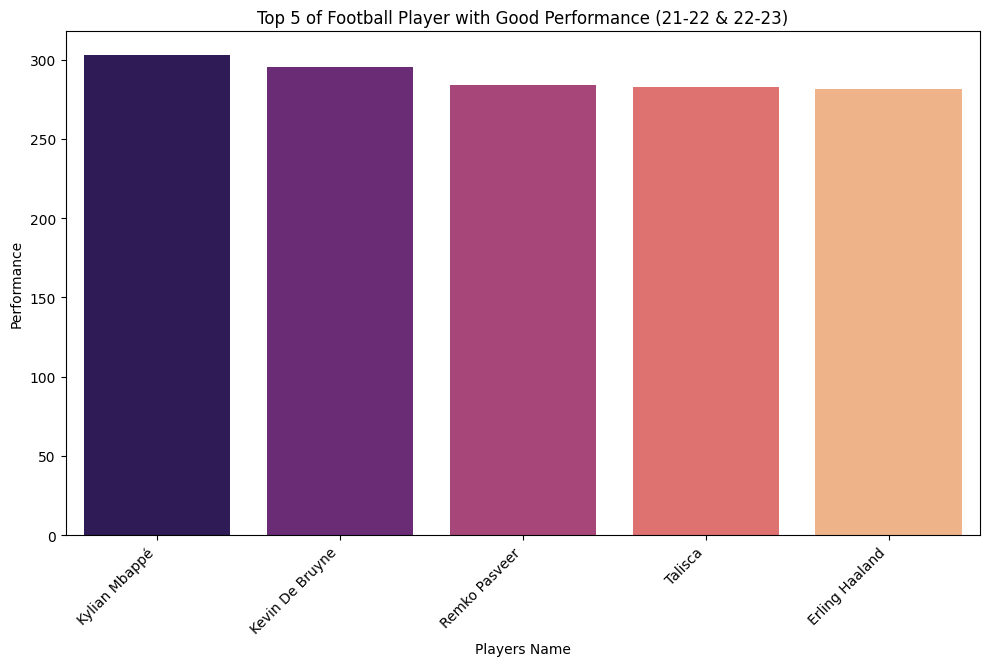

In [420]:
df_stats = df_clean.sort_values(by='stats', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_stats.head(5), x='name', y='stats', hue='name', palette='magma', legend=False)
plt.xlabel('Players Name')
plt.ylabel('Performance')
plt.title('Top 5 of Football Player with Good Performance (21-22 & 22-23)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Insight : Digunakan `matplotlib` untuk pembuatan `grafik` serta didukung oleh `seaborn` sebagai `desain` pada grafik. Dan juga digunakan fungsi `sort_values` untuk `mengurutkan` dari yang terbesar statistiknya. Dan yang memiliki statistik `tertinggi` pada pemain di musim `2021-2022 & 2022-2023` yaitu `Kylian Mbappé` dengan nilai `302.67`.

### 4. Pemain mana saja yang memiliki menit bermain lebih dari 75 menit per game (kecuali kiper)?

In [421]:
no_gk = df_clean[df_clean['position'] != 'Goalkeeper']

caps_75 = no_gk[(no_gk['minutes_played'] / no_gk['appearance']) > 75]
caps_75_sort = caps_75.sort_values(by='minutes_played', ascending=False)
caps_75_sort[['name']].head(10)

,name
1521,Vinicius Junior
22,Bruno Fernandes
5692,Josh Cullen
5567,Max Power
1508,Antonio Rüdiger
5738,John Egan
4286,Alejandro Grimaldo
1506,Éder Militão
42,Declan Rice
501,Harry Kane


Insight : Pada 10 data yang ditampilkan merupakan 10 pemain yang memiliki `stamina tertinggi` berdasarkan `menit bermain`. Tapi dalam perhitungan ini, `tidak mengambil` data kiper,dikarenakan `kiper jarang diganti` menurut analisis yang saya amati selama menonton bola ribuan pertandingan. Jadi, dalam hal ini kiper `tidak diikutsertakan` dalam perhitungan `stamina` pada pemain. Dan juga saya mematok menit bermain cukup tinggi yaitu lebih besar sama dengan `75 menit` untuk mengartikan bahwa pemain memiliki `stamina` yang cukup `kuat`.

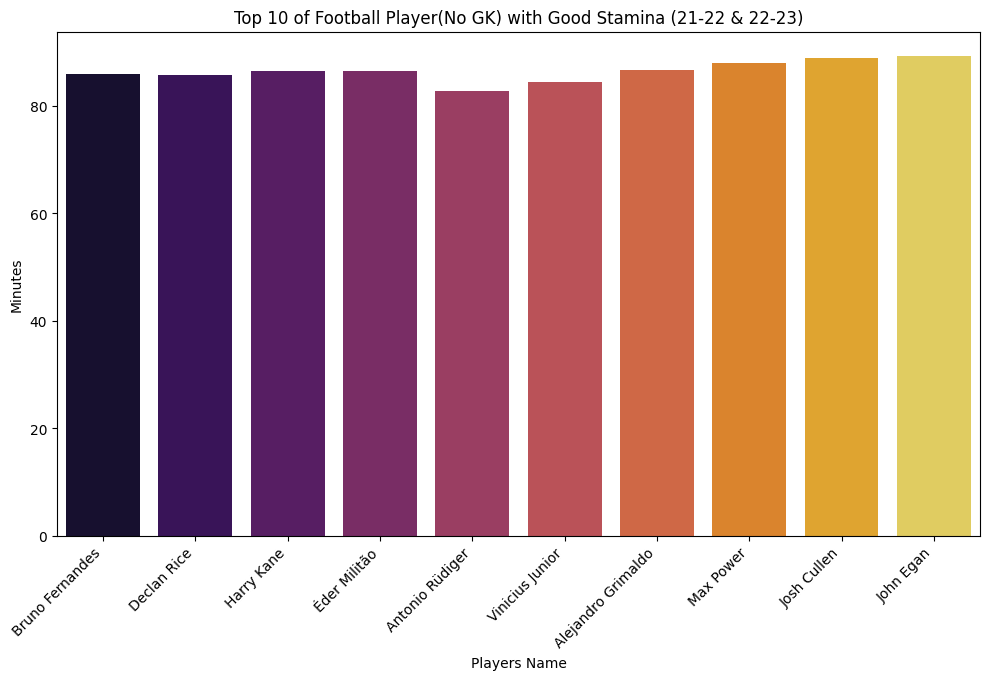

In [441]:
caps_75_sort = caps_75.sort_values(by='minutes_played', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=caps_75_sort.head(10), x='name', y=no_gk['minutes_played'] / no_gk['appearance'], hue='name', palette='inferno', legend=False)
plt.xlabel('Players Name')
plt.ylabel('Minutes')
plt.title('Top 10 of Football Player(No GK) with Good Stamina (21-22 & 22-23)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Insight : Ini merupakan `grafik` pada `stamina pemain` berdasarkan menit bermain di `2 musim(21/22 & 22/23)` menggunakan package `matplotlib` dan `seaborn`. Dari `10 pemain` yang ditampilkan, semuanya `diatas 80 menit` per pertandingan. Artinya memenuhi syarat yaitu `melebihi 75 menit` bermain. Namun untuk Antonio Rüdiger dan Vinicius Junior, agak sedikit di bawah rata-rata pada 10 pemain yang ditampilkan.

### 5. Team manakah yang terbaik? (acuan statistik)

In [423]:
df_team = df_clean.groupby('team')['stats'].sum()
good_team = df_team.sort_values(ascending=False)
good_team.head(1)

team
Manchester City    2237.99
Name: stats, dtype: float64

Insight : Untuk `tim yang terbaik`, didapatkan hasil dari `penjumlahan statistik` terhadap seluruh pemain `berdasarkan timnya` masing-masing. Pada penjumlahan, digunakan fungsi `sum` dan untuk mengambil data tim, digunakan fungsi `groupby` pada pandas. Maka hasilnya adalah tim `Manchester City` meraih tim dengan statistik pemain yang tinggi yaitu sebesar 2237.99. Sebenarnya lebih cocok `dirata-ratakan`, namun karena tadi sudah dilakukan `cleaning data` yang mana hanya pemain yang mempunya `menit bermain` lebih dari sama dengan `4500`, maka lebih `koheren dijumlahkan bukan dirata-ratakan` yang mana `jika dirata-ratakan`, akan sama seperti `data sampling` atau cleaning data tadi `tidak dapat memberikan pengaruh` apa-apa `terhadap perhitungan tim terbaik`.

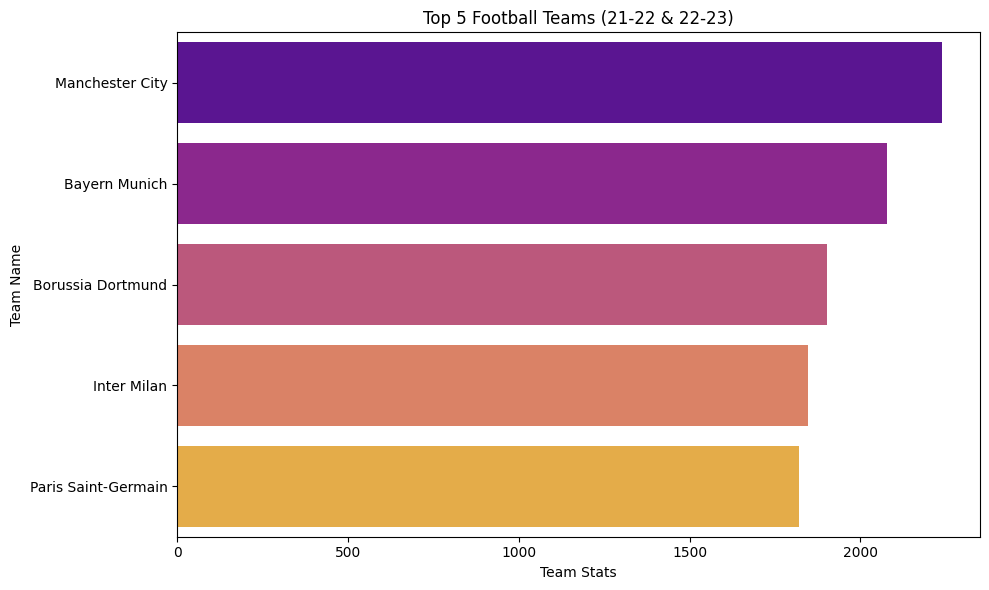

In [424]:
good_team = df_team.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=good_team.values, y=good_team.index, hue=good_team.index, palette='plasma', legend=False)
plt.xlabel('Team Stats')
plt.ylabel('Team Name')
plt.title('Top 5 Football Teams (21-22 & 22-23)')
plt.tight_layout()
plt.show()

Insight : Grafik di atas menampilkan `5 tim terbaik` pada 2 musim yaitu `2021/2022 dan 2022/2023`. Grafik membentang secara `horizontal`, dikarenakan dapat dilihat dengan baik terhadap `ranking tim` berdasarkan statistik pemain. Maka, grafik menunjukkan bahwa `Manchester City` merupakan `tim terbaik`. Pembuatan `grafik` digunakan package `matplotlib` dan `seaborn` sebagai `desainnya`.

### 6. Apakah statistik di lapangan sangat berpengaruh terhadap value pemain?

In [432]:
df_clean['decreased_value(%)'] = ((df_clean['highest_value(EUR)'] - df_clean['current_value(EUR)']) / df_clean['current_value(EUR)']) *100

def decreased_value_level(decreased_value):
    if decreased_value == 0:
        return '-'
    elif decreased_value <= 25:
        return 'Low'
    elif decreased_value <= 50:
        return 'Medium'
    else:
        return 'High'

df_clean['decreased_value_level'] = df_clean['decreased_value(%)'].apply(decreased_value_level)
df_clean

,team,name,position,height,age,appearance,goals_avg,assists_avg,goals-conceded_avg,clean-sheets_avg,minutes_played,games_injured,award,current_value(EUR),highest_value(EUR),position_encoded,winger,stats,decreased_value(%),decreased_value_level
0,Manchester United,David de Gea,Goalkeeper,189,32,104,0.00,0.00,1.22,0.34,9390,5,13,15000000,70000000,1,0,172.00,366.666667,High
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175,25,82,0.03,0.06,0.00,0.00,6408,22,9,50000000,50000000,2,0,46.00,0.000000,-
4,Manchester United,Raphaël Varane,Defender Centre-Back,191,30,63,0.02,0.02,0.00,0.00,5031,51,21,40000000,80000000,2,0,34.00,100.000000,High
5,Manchester United,Harry Maguire,Defender Centre-Back,194,30,68,0.04,0.00,0.00,0.00,4762,27,1,25000000,70000000,2,0,27.33,180.000000,High
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187,28,70,0.00,0.03,0.00,0.00,5471,19,10,15000000,35000000,2,0,16.67,133.333333,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10697,Adelaide United,Joe Gauci,Goalkeeper,194,22,54,0.00,0.00,1.45,0.20,4857,0,0,450000,450000,1,0,71.67,0.000000,-
10705,Adelaide United,Ryan Kitto,Defender Left-Back,179,28,58,0.13,0.08,0.00,0.00,4796,0,2,400000,450000,2,1,92.00,12.500000,Low
10708,Adelaide United,Javi López,Defender Right-Back,180,37,57,0.04,0.09,0.00,0.00,4903,36,0,200000,3000000,2,1,45.33,1400.000000,High
10718,Adelaide United,Craig Goodwin,Attack-LeftWinger,183,31,55,0.45,0.33,0.00,0.00,4601,1,3,1500000,1500000,4,1,166.00,0.000000,-


Insight : Sebelum analisis uji `korelasi` menggunakan `hipotesis`, terlebih dahulu `dibuat kolom` baru yaitu `decresed_value(%)` untuk melihat sebesar apa penurunan value tiap pemain. Kemudian setelah decreased_value(%) dibuat, ditambah kolom baru untuk decreased_value_level. Ini dilakukan agar pada uji `korelasi`, dapat menjadi `rujukan` yang `kuat`, karena melihat tinggi atau rendahnya `penurunan` pada `value` dari perhitungan `current dan highest value` yang kemudian perhitungan tersebut digunakan konsep `kategorikal` seperti Low, Medium, dan High. Kategorikal tersebut juga digunakan konsep `kondisional` pada method. Kemudian `implementasi` dari `method` tadi menggunakan fungsi `apply`. Setelah itu diuji korelasinya menggunakan konsep `hipotesis` untuk dapat dianalisis lebih lanjut.

In [433]:
import numpy as np

data = df_clean.dropna(subset=['stats', 'decreased_value(%)', 'decreased_value_level'])
data = data.replace([np.inf, -np.inf], np.nan).dropna()

Insight : Dilakukan `cleaning` pada kolom yang baru dibuat untuk dapat dilakukan analisis uji `korelasi`. Digunakan package `numpy` untuk dapat melakukan `fungsionalitas` pada `numerik`. Kemudian juga digunakan fungsi `dropna` dan `replace` untuk `menghapus` `value yang kosong` dan `infinity`. Setelah itu, dapat melakukan `uji korelasi` dengan memberikan `asumsi hipotesis` terlebih dahulu. 

##### `H0 : Tidak ada hubungan antara statistik pemain di lapangan dengan naik atau turunnya value pada pemain.`<br>
##### `H1 : Terdapat hubungan antara statistik pemain di lapangan dengan naik atau turunnya value pada pemain.`<br>

In [435]:
contingency_table = pd.crosstab(data['stats'],data['decreased_value_level'])
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.38248113230414255


Insight : Dalam pengujian korelasi dengan `Chi-Squared Test` di atas, digunakan fungsi `crosstab` untuk membuat tabel silang dan juga digunakan fungsi `stats.chi2_contingency` yang mana dapat menghitung berapa besar korelasi antara 2 variabel yaitu `stats` dan `decreased_value_level`. Hasilnya digunakan fungsi `pvalue` untuk menghitung P-Value yang dijadikan hipotesis. Pada hasil, `P-Value` tidak dianggap sebagai bukti yang kuat untuk `menolak H0`, karena jauh `di atas` tingkat signifikansi atau `critical value 0.05` yaitu sebesar `0.38`. Maka kemudian, `H0 dapat diterima` yang mana `Tidak ada hubungan antara statistik pemain di lapangan dengan value pada pemain`.

# **Pengambilan Kesimpulan**

<div style="text-align: justify;" >
&emsp;Setelah semua proses pada problem statement di awal yang mana pada inti dari problem statement adalah melihat korelasi antara statistik atau kinerja pemain di lapangan dengan naik atau turunnya value. Hasil didapat bahwa tidak ada korelasi yang kuat antara kedua variabel tersebut. Itu terjadi dikarenakan memang data-data yang ada tidak cukup kuat untuk dijadikan uji hipotesis pada statistik dan juga value. Statistik pada data tidak cukup kuat, karena hanya terdapat 4 statistik kinerja pemain yang mana 2 untuk non-goalkeeper dan 2 untuk goalkeeper. Solusinya adalah jika ingin melakukan uji hipotesis yang kuat, variabel-variabel harus lengkap untuk mendukung uji tersebut. Dalam hal ini, variabel yang harus ditambahkan pada data yaitu chance created, defensive progress, clearence, blocking, goals attempt, dan lain sebagainya. Pada data, tidak cukup kuat untuk mendukung statistik pada pemain bertahan terutama bek. Jadi, pada intinya adalah jika ingin melakukan uji hipotesis, terlebih dahulu melihat variabel-variabelnya apakah mendukung atau tidak. Kemudian juga lihat kembali apakah varibel tersebut butuh dukungan dari variabel lain seperti usia misalnya. Usia juga dapat dijadikan rujukan pada uji hipotesis, karena usia yang semakin tua akan mempengaruhi penurunan pada value pemain. Atau mungkin faktor cidera juga memengaruhi pada value. Dan lain sebagainya.</div>